# Maximum likelihood estimation: how neural networks learn

This reading is a review of maximum likelihood estimation (MLE), an important learning principle used in neural network training.

In [ ]:
from IPython.display import Image

## Introduction

Why are neural networks trained the way they are? For example, why do you use a mean squared error loss function for a regression task, but a sparse categorical crossentropy loss for classification? The answer lies in the *likelihood* function, with a long history in statistics. In this reading, we'll look at what this function is and how it leads to the loss functions used to train deep learning models.

Since you're taking a course in Tensorflow Probability, I'll assume you already have some understanding of probability distributions, both discrete and continous. If you don't, there are countless resources to help you understand them. I find the [Wikipedia page](https://en.wikipedia.org/wiki/Probability_distribution) works well for an intuitive introduction. For a more solid mathematical description, see an introductory statistics course.

## Probability mass and probability density functions

Every probability distribution has either a probability mass function (if the distribution is discrete) or a probability density function (if the distribution is continuous). This function roughly indicates the probability of a sample taking a particular value. We will denote this function $P(y | \theta)$ where $y$ is the value of the sample and $\theta$ is the parameter describing the probability distribution. Written out mathematically, we have:

$$
P(y | \theta) = \text{Prob} (\text{sampling value $y$ from a distribution with parameter $\theta$}).
$$

When more than one sample is drawn *independently* from the same distribution (which we usually assume), the probability mass/density function of the sample values $y_1, \ldots, y_n$ is the product of the probability mass/density functions for each individual $y_i$. Written formally:

$$
P(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n P(y_i | \theta).
$$

This all sounds more complicated than it is: see the examples below for a more concrete illustration.

## The likelihood function

Probability mass/density functions are usually considered functions of $y_1, \ldots, y_n$, with the parameter $\theta$ considered fixed. They are used when you know the parameter $\theta$ and want to know the probability of a sample taking some values $y_1, \ldots, y_n$. You use this function in *probability*, where you know the distribution and want to make deductions about possible values sampled from it.

The *likelihood* function is the same, but with the $y_1, \ldots, y_n$ considered fixed and with $\theta$ considered the independent variable. You usually use this function when you know the sample values $y_1, \ldots, y_n$ (because you've observed them by collecting data), but don't know the parameter $\theta$. You use this function in *statistics*, where you know the data and want to make inferences about the distribution they came from. 

This is an important point, so I'll repeat it: $P(y_1, \ldots, y_n | \theta)$ is called the *probability mass/density function* when considered as a function of $y_1, \ldots, y_n$ with $\theta$ fixed. It's called the *likelihood* when considered as a function of $\theta$ with $y_1, \ldots, y_n$ fixed. For the likelihood, the convention is using the letter $L$, so that

$$
\underbrace{L(y_1, \ldots, y_n | \theta)}_{\text{ likelihood,} \\ \text{function of $\theta$}} = \underbrace{P(y_1, \ldots, y_n | \theta)}_{\text{probabiliy mass/density,} \\ \text{ function of $y_1, \ldots, y_n$}}
$$

Let's see some examples of this below.

#### Bernoulli distribution

We'll start by looking at the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) with parameter $\theta$. It's the distribution of a random variable that takes value 1 with probability $\theta$ and 0 with probability $1-\theta$. Let $P(y | \theta)$ be the probability that the event returns value $y$ given parameter $\theta$. Then

$$
\begin{align}
L(y | \theta) = P(y | \theta) &= \begin{cases}
1 - \theta \quad \text{if} \, y = 0 \\
\theta \quad \quad \, \, \, \text{if} \, y = 1 \\
\end{cases} \\
&= (1 - \theta)^{1 - y} \theta^y \quad y \in \{0, 1\}
\end{align}
$$

If we assume samples are independent, we also have
$$
L(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n (1 - \theta)^{1 - y_i} \theta^{y_i}.
$$

For example, the probability of observing $0, 0, 0, 1, 0$ is

$$
L(0, 0, 0, 1, 0 | \theta) = (1 - \theta)(1 - \theta)(1 - \theta)\theta(1 - \theta) = \theta(1 - \theta)^4.
$$

Note that, in this case, we have fixed the data, and are left with a function just of $\theta$. This is called the *likelihood* function. Let's plot the likelihood as a function of $\theta$ below.

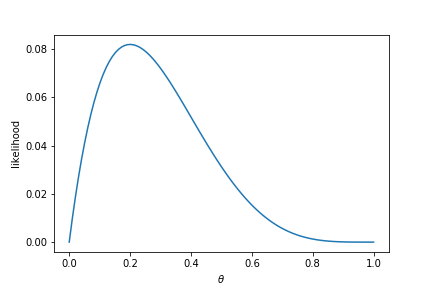

In [ ]:
# Run this cell to download and view a figure to plot the Bernoulli likelihood function

!wget -q -O bernoulli_likelihood.png --no-check-certificate "https://docs.google.com/uc?export=download&id=1vX9ARfK3QU6ZqxUyMM63s2lKfdwx2Bj9"
Image("bernoulli_likelihood.png", width=500)

#### Normal (Gaussian) distribution

This idea also generalises naturally to the [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (also called the *Gaussian* distribution). This distribution has two parameters: a mean $\mu$ and a standard deviation $\sigma$. We hence let $\theta = (\mu, \sigma)$. The probability density function (the analogue of the probability mass function for continuous distributions) is:

$$
L(y | \theta) = P(y | \theta) = P(y | \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{1}{2 \sigma^2} (y - \mu)^2 \Big).
$$

For a sequence of independent observations $y_1, \ldots, y_n$, the likelihood is 

$$
L(y_1, \ldots, y_n | \mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{1}{2 \sigma^2} (y_i - \mu)^2 \Big).
$$

The *likelihood* is hence the same, but viewed as a function of $\mu$ and $\sigma$, with $y_1, \ldots, y_n$ viewed as constants. For example, if the observed data is -1, 0, 1, the likelihood becomes

$$
L(-1, 0, 1 | \mu, \sigma) = (2 \pi \sigma^2)^{-3/2} \exp \Big( - \frac{1}{2 \sigma^2} (\mu-1)^2 + (\mu)^2 + (\mu+1)^2 \Big).
$$

which we can plot as a function of $\mu$ an $\sigma$ below.

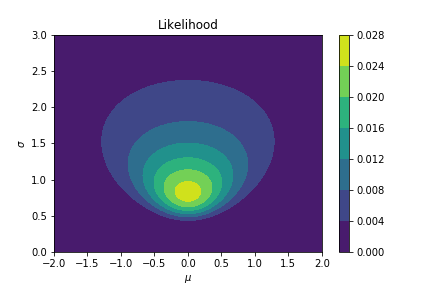

In [ ]:
# Run this cell to download and view a figure to plot the Gaussian likelihood function

!wget -q -O gaussian_likelihood.png --no-check-certificate "https://docs.google.com/uc?export=download&id=1vKOhDpuujwANx1dpAw5-CMLPeIiyDgEi"
Image("gaussian_likelihood.png", width=500)

## Maximum likelihood estimation

The likelihood function is commonly used in statistical inference when we are trying to fit a distribution to some data. This is usually done as follows. Suppose we have observed data $y_1, \ldots, y_n$, assumed to be from some distribution with unknown parameter $\theta$, which we want to estimate. The likelihood is

$$
L(y_1, \ldots, y_n | \theta).
$$

The *maximum likelihood estimate* $\theta_{\text{MLE}}$ of the parameter $\theta$ is then the value that maximises the likelihood $L(y_1, \ldots, y_n | \theta)$. For the example of the Bernoulli distribution with observed data 0, 0, 0, 1, 0 (as in the plot above), this gives us $p=\frac{1}{5}$, which is where the plot takes its maximum. For the normal distribution with data -1, 0, 1, this is the region where the plot is brightest (indicating the highest value), and this occurs at $\mu=0, \sigma=\sqrt{\frac{2}{3}}$. In this way, we *pick the values of the parameter that make the data we have observed the most likely*. Written in mathematical notation, this is 

$$
\theta_{\text{MLE}} = \arg \max_{\theta} L(y_1, \ldots, y_n | \theta).
$$

## The negative log-likelihood

Recall that, for independent observations, the likelihood becomes a product:

$$
L(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n P(y_i | \theta).
$$

Furthermore, since the $\log$ function increases with its argument, maximising the likelihood is equivalent to maximising the log-likelihood $\log L(y_1, \ldots, y_n | \theta)$. This changes the product into a sum:

$$
\begin{align}
\theta_{\text{MLE}} &= \arg \max_{\theta} L(y_1, \ldots, y_n | \theta) \\
&= \arg \max_{\theta} \log L(y_1, \ldots, y_n | \theta) \\
&= \arg \max_{\theta} \log \prod_{i=1}^n L(y_i | \theta) \\
&= \arg \max_{\theta} \sum_{i=1}^n \log L(y_i | \theta).
\end{align}
$$

Furthermore, convention in optimisation is that we always *minimise* a function instead of maximising it. Hence, maximising the likelihood is equivalent to *minimising* the *negative log-likelihood*:

$$
\theta_{\text{MLE}} = \arg \min_{\theta} \text{NLL}(y_1, \ldots, y_n | \theta)
$$

where the *negative log-likelihood* NLL is defined as

$$
\text{NLL}(y_1, \ldots, y_n | \theta) = - \sum_{i=1}^n \log L(y_i | \theta).
$$

## Training neural networks

How is all this used to train neural networks? We do this, given some training data, by picking the weights of the neural network that maximise the likelihood (or, equivalently, minimise the negative loglikelihood) of having observed that data. More specifically, the neural network is a function that maps a data point $x_i$ to the parameter $\theta$ of some distribution. This parameter indicates the probability of seeing each possible label. We then use our true labels and the likelihood to find the best weights of the neural network.

Let's be a bit more precise about this. Suppose we have a neural network $\text{NN}$ with weights $\mathbf{w}$. Furthemore, suppose $x_i$ is some data point, e.g. an image to be classified, or an $x$ value for which we want to predict the $y$ value. The neural network prediction (the feedforward value) $\hat{y}_i$ is 

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}).
$$

We can use this to train the neural network (determine its weights $\mathbf{w}$) as follows. We assume that the neural network prediction $\hat{y}_i$ forms part of a distribution that the true label is drawn from. Suppose we have some training data consisting of inputs and the associated labels. Let the data be $x_i$ and the labels $y_i$ for $i=1, \ldots, n$, where $n$ is the number of training samples. The training data is hence

$$
\text{training data} = \{(x_1, y_1), \ldots, (x_n, y_n)\}
$$

For each point $x_i$, we have the neural network prediction $\hat{y}_i = \text{NN}(x_i | \mathbf{w})$, which we assume specifies a distribution. We also have the true label $y_i$. The weights of the trained neural network are then those that minimise the negative log-likelihood:

$$
\begin{align}
\mathbf{w}^* &= \arg \min_{\mathbf{w}} \big( - \sum_{i=1}^n \log L(y_i | \hat{y}_i) \big) \\
&= \arg \min_{\mathbf{w}} \big( - \sum_{i=1}^n \log L(y_i | \text{NN}(x_i | \mathbf{w})) \big)
\end{align}
$$

In practice, determining the true optimum $\mathbf{w}^*$ is not always possible. Instead, an approximate value is sought using stochastic gradient descent, usually via a *backpropagation* of derivatives and some optimization algorithm such as `RMSprop` or `Adam`.

Let's see some examples to make this idea more concrete.

#### Bernoulli distribution: binary classifiers

Suppose we want a neural network NN that classifies images into either cats or dogs. Here, $x_i$ is an image of either a cat or a dog, and $\hat{y}_i$ is the probability that this image is either a cat (value 0) or a dog (value 1):

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}) = \text{Prob}(\text{image is dog}).
$$

Note that this is just a Bernoulli distribution with values 0 and 1 corresponding to cat and dog respectively, of which we discussed the likelihood function above. Given training data $\{(x_1, y_1), \ldots, (x_n, y_n)\}$, with $y_i \in \{0, 1\}$, we have the negative log-likelihood

$$
\begin{align}
\text{NLL}((x_1, y_1), \ldots, (x_n, y_n) | \mathbf{w}) &= - \sum_{i=1}^n \log L(y_i | \hat{y}_i) \\
&= - \sum_{i=1}^n \log \big( (1 - \hat{y}_i)^{1 - y_i} \hat{y}_i^{y_i} \big) \\
&= - \sum_{i=1}^n \big( (1 - y_i) \log(1 - \hat{y}_i) + y_i \log \hat{y}_i \big) \\
&= - \sum_{i=1}^n \big( (1 - y_i) \log(1 - \text{NN}(x_i | \mathbf{w})) + y_i \log \text{NN}(x_i | \mathbf{w}) \big). \\
\end{align}
$$

This is exactly the sparse categorical cross-entropy loss function used when training a classification neural network. Hence, the reason why we typically use categorical cross-entropy loss functions when training classification data is exactly because this is the negative log-likelihood under a Bernoulli (or, when there are more than 2 classes, a categorical) distribution.

#### Normal distribution: least squares regression

The idea works the same way in a regression task. Here, we have an $x$-value $x_i$ and want to predict the associated $y$-value $y_i$. We can use a neural network to do this, giving a prediction $\hat{y}_i$:

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}).
$$

For example, suppose we were doing linear regression with the following data.

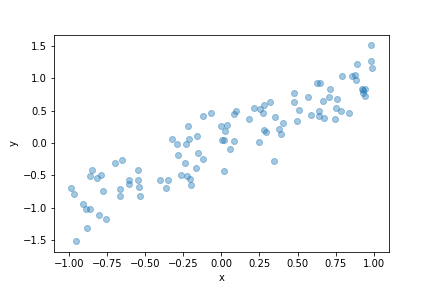

In [ ]:
# Run this cell to download and view a figure to plot the example data

!wget -q -O linear_regression.png --no-check-certificate "https://docs.google.com/uc?export=download&id=13p6E1qKf92b7UIYOxkU_jPpu9R5rUWfz"
Image("linear_regression.png", width=500)

It's not possible to put a straight line through every data point. Furthermore, even points with the same $x$ value might not have the same $y$ value. We can interpret this as $y$ being linearly related to $x$ with some noise. More precisely, we may assume that

$$
y_i = f(x_i) + \epsilon_i \quad \quad  \epsilon_i \sim N(0, \sigma^2)
$$

where $f$ is some function we want to determine (the regression) and $\epsilon_i$ is some Gaussian noise with mean 0 and constant variance $\sigma^2$. In deep learning, we might approximate $f(x_i)$ by a neural network $\text{NN}(x_i | \mathbf{w})$ with weights $\mathbf{w}$ and output $\hat{y}_i$.

$$
\hat{y}_i = \text{NN}(x_i | \mathbf{w}) = f(x_i)
$$

Under this assumption, we have 

$$
\epsilon_i = y_i - \hat{y}_i \sim N(0, \sigma^2)
$$

and hence, given training data $\{(x_1, y_1), \ldots, (x_n, y_n)\}$, we have the negative log-likelihood (assuming the noise terms are independent):

$$
\begin{align}
\text{NLL}((x_1, y_1), \ldots, (x_n, y_n) | \mathbf{w}) &= - \sum_{i=1}^n \log L(y_i | \hat{y}_i) \\
&= - \sum_{i=1}^n \log \Big( \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big( - \frac{1}{2\sigma^2} (\hat{y}_i - y_i)^2 \Big) \Big) \\
&= \frac{n}{2} \log (2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (\hat{y}_i - y_i)^2 \\
&= \frac{n}{2} \log (2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (\text{NN}(x_i | \mathbf{w}) - y_i)^2.
\end{align}
$$

Note that only the last term includes the weights. Hence, minimising the negative log-likelihood is equivalent to minimising 

$$
\sum_{i=1}^n (\text{NN}(x_i | \mathbf{w}) - y_i)^2
$$

which is exactly the sum of squared errors. Hence, least squares regression (or training a neural network using the mean squared error) is equivalent to training a neural network to match the expected value of an output by minimising the negative log-likelihood assuming a Gaussian error term with constant variance.

## Conclusion

This was a very short introduction to maximum likelihood estimation, which is essential for deep learning, especially of the probabilistic variety that we'll be doing in this course. The method of maximum likelihood estimation is key to training neural networks, and typically informs the choice of loss function. In fact, you have probably trained neural networks using maximum likelihood estimation without even knowing it!

## Further reading and resources
I find that the Wikipedia pages for many statistical concepts offer excellent intuition. If you'd like to read up on these ideas in more detail, I'd recommend these:
* The Wikipedia page for Probability Distribution: https://en.wikipedia.org/wiki/Probability_distribution
* The Wikipedia page for Maximum Likelihood Estimation: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation